<a href="https://colab.research.google.com/github/Rabinlamichhane1606/Data-Science/blob/master/ImageClassification3dPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import seaborn as sns
from tensorflow.keras.applications import ResNet50, VGG16, EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Mounted at /content/drive


In [ ]:
# Data Augmentation and Normalization
data_gen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_gen = ImageDataGenerator(rescale=1.0 / 255)

# Function to add custom layers and compile models
def build_and_compile_model(base_model):
    base_model.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(3, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define models to compare
models_to_compare = {
    "ResNet50": ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    "VGG16": VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    "EfficientNetB0": EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
}


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Function to plot training accuracy and loss curves
def plot_training_curves(history, model_name, fold):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy (Fold {fold})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss (Fold {fold})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name, fold):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Pestols', 'Revolvers','3dguns'],
                yticklabels=['Pestols', 'Revolvers','3dguns'])
    plt.title(f'Confusion Matrix - {model_name} (Fold {fold})')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_true, Y_pred, model_name, fold):
    fpr, tpr, _ = roc_curve(y_true, Y_pred[:, 1])  # Assuming binary classification
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve (Fold {fold})')
    plt.legend(loc='lower right')
    plt.show()

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(y_true, Y_pred, model_name, fold):
    precision, recall, _ = precision_recall_curve(y_true, Y_pred[:, 1])
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model_name} - Precision-Recall Curve (Fold {fold})')
    plt.show()


In [ ]:
# Prepare dataset directory
dataset_dir = '/content/drive/MyDrive/dataset_3dPR/train'
all_image_paths = []
all_labels = []

# Assuming dataset is organized in class-specific subdirectories
for class_dir in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_dir)
    if os.path.isdir(class_path):
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            all_image_paths.append(image_path)
            all_labels.append(class_dir)  # Assumes subdirectory names are the class labels


Training Fold 1...
Found 73 validated image filenames belonging to 3 classes.
Found 19 validated image filenames belonging to 3 classes.
Training ResNet50 model for Fold 1...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.3621 - loss: 1.9429 - val_accuracy: 0.2500 - val_loss: 1.4010
Epoch 2/10
 1/18 ━━━━━━━━━━━━━━━━━━━━ 13s 810ms/step - accuracy: 0.5000 - loss: 0.8991

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 353ms/step - accuracy: 0.5000 - loss: 0.8991 - val_accuracy: 1.0000 - val_loss: 0.5185
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 53s 859ms/step - accuracy: 0.4858 - loss: 1.1146 - val_accuracy: 0.3750 - val_loss: 0.9400
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 1.0000 - loss: 0.6481 - val_accuracy: 1.0000 - val_loss: 0.2094
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 873ms/step - accuracy: 0.5098 - loss: 1.3204 - val_accuracy: 0.2500 - val_loss: 1.8750
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.5000 - loss: 1.6047 - val_accuracy: 1.0000 - val_loss: 0.1423
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 894ms/step - accuracy: 0.6499 - loss: 0.9788 - val_accuracy: 0.3750 - val_loss: 0.9537
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 1.0000 - loss: 0.3021 - val_accuracy: 1.0000 - val_loss: 0.2667
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 942ms/step - accuracy: 0.5103 - loss: 1.0158 - val_accuracy: 0.2500 - va

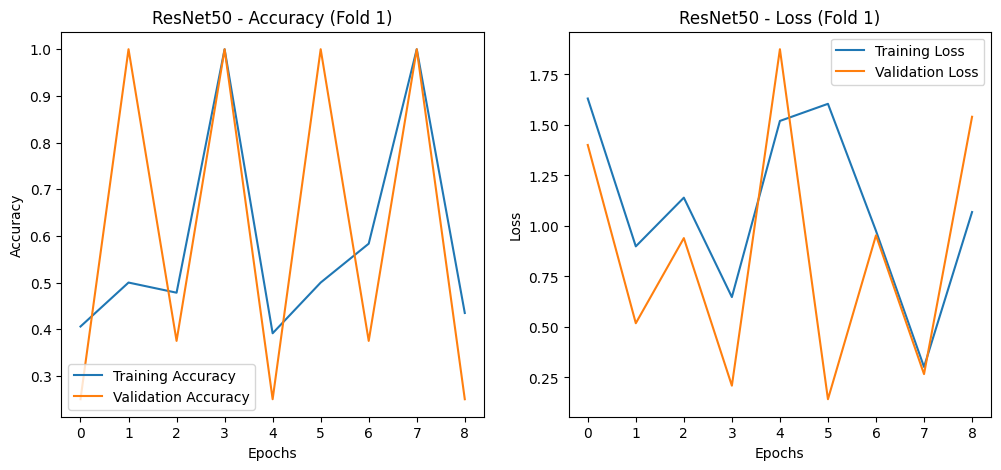

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 557ms/step - accuracy: 0.1645 - loss: 2.1450
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step


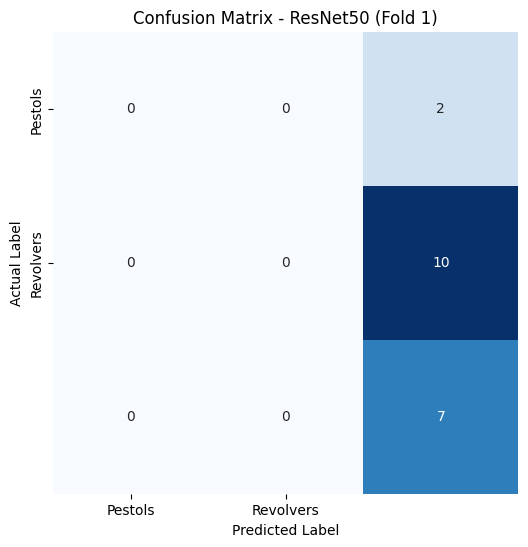

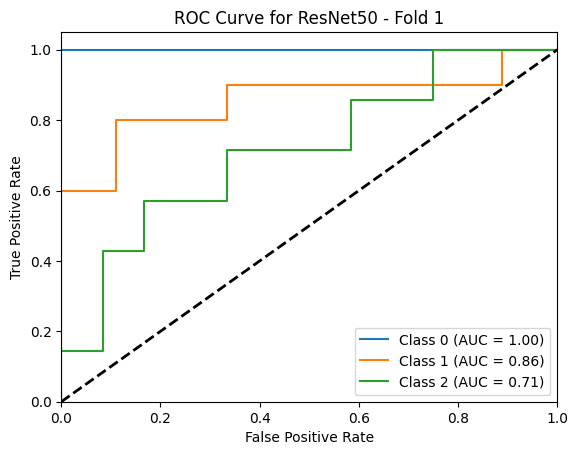

Training VGG16 model for Fold 1...
Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.5085 - loss: 1.0968 - val_accuracy: 0.7500 - val_loss: 0.5194
Epoch 2/10
 1/18 ━━━━━━━━━━━━━━━━━━━━ 7s 465ms/step - accuracy: 1.0000 - loss: 0.5098

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 581ms/step - accuracy: 1.0000 - loss: 0.5098 - val_accuracy: 1.0000 - val_loss: 0.6871
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.6840 - loss: 0.6228 - val_accuracy: 0.9375 - val_loss: 0.3836


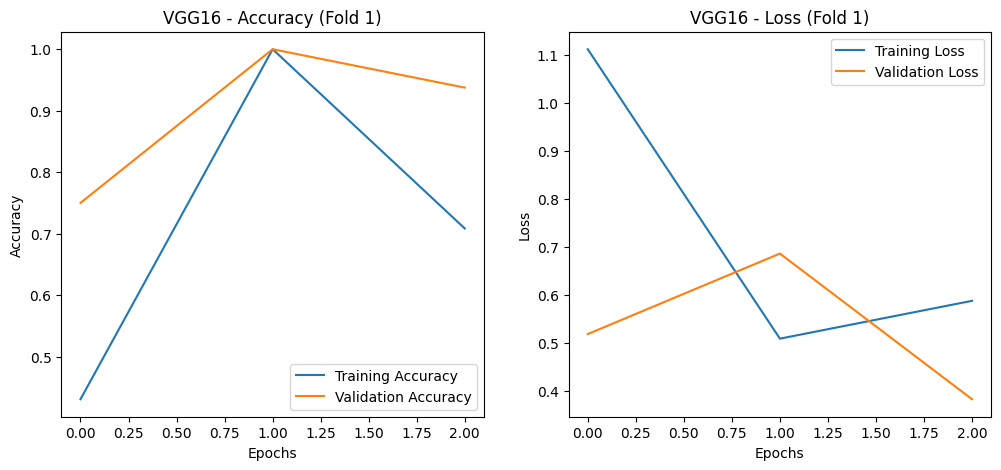

5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8531 - loss: 0.5081
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step


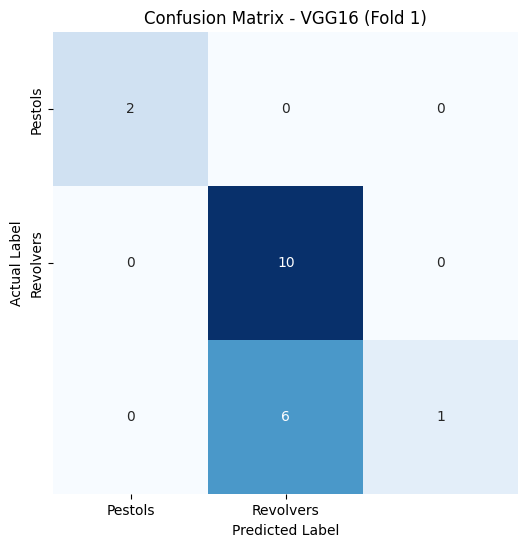

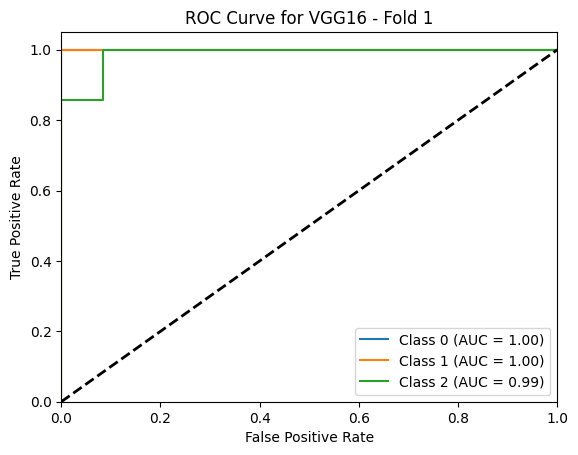

Training EfficientNetB0 model for Fold 1...
Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 583ms/step - accuracy: 0.4542 - loss: 1.0161 - val_accuracy: 0.2500 - val_loss: 1.1805
Epoch 2/10
 1/18 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step - accuracy: 0.7500 - loss: 1.1450

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7500 - loss: 1.1450 - val_accuracy: 1.0000 - val_loss: 0.4287
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 430ms/step - accuracy: 0.4733 - loss: 0.9595 - val_accuracy: 0.2500 - val_loss: 1.2703


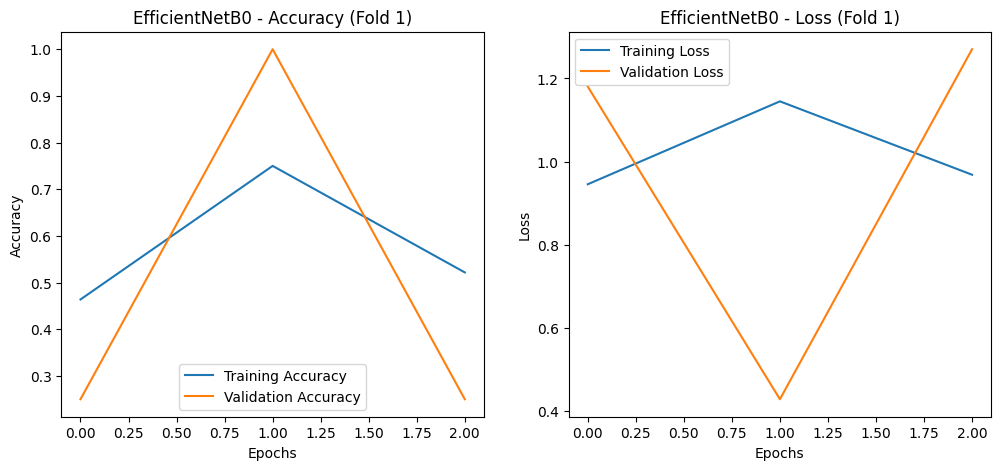

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - accuracy: 0.1645 - loss: 1.4044


4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step


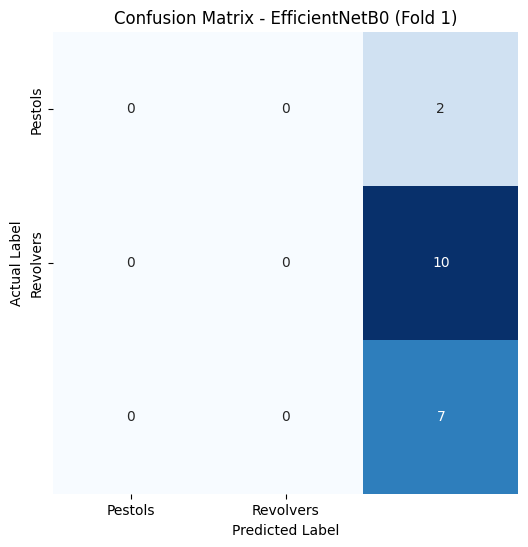

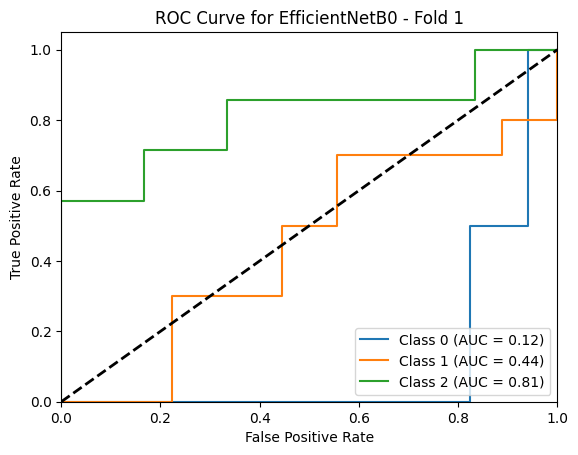

Training Fold 2...
Found 73 validated image filenames belonging to 3 classes.
Found 19 validated image filenames belonging to 3 classes.
Training ResNet50 model for Fold 2...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.3278 - loss: 1.4766 - val_accuracy: 0.3125 - val_loss: 1.2958
Epoch 2/10
 1/18 ━━━━━━━━━━━━━━━━━━━━ 9s 577ms/step - accuracy: 0.5000 - loss: 0.8369

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5000 - loss: 0.8369 - val_accuracy: 1.0000 - val_loss: 0.2847
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 37s 936ms/step - accuracy: 0.3702 - loss: 1.3724 - val_accuracy: 0.4375 - val_loss: 0.9306
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5000 - loss: 0.6368 - val_accuracy: 1.0000 - val_loss: 0.4670
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 872ms/step - accuracy: 0.5418 - loss: 0.8903 - val_accuracy: 0.6250 - val_loss: 0.7348


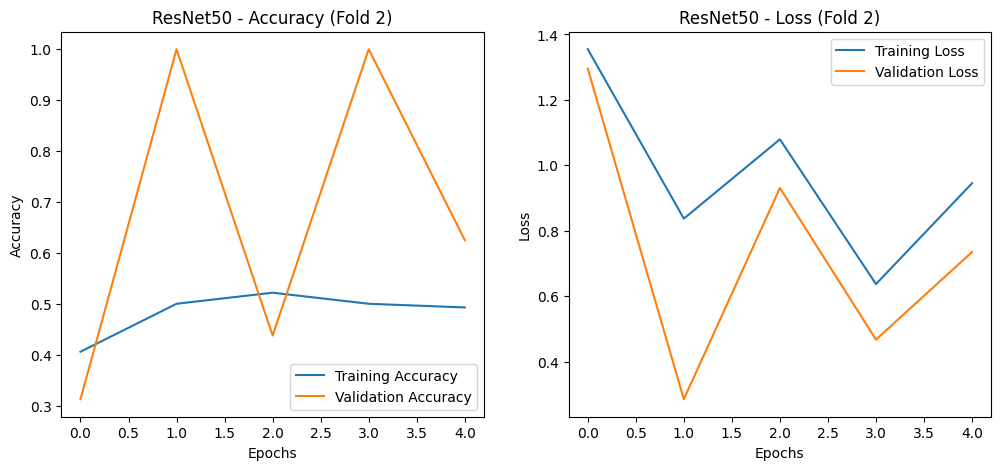

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 557ms/step - accuracy: 0.2063 - loss: 1.5336
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step


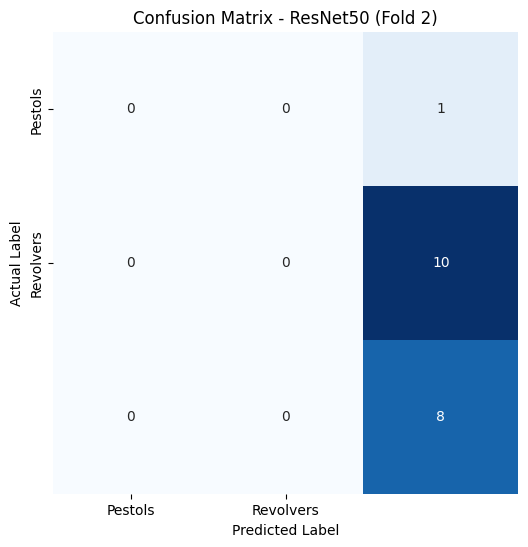

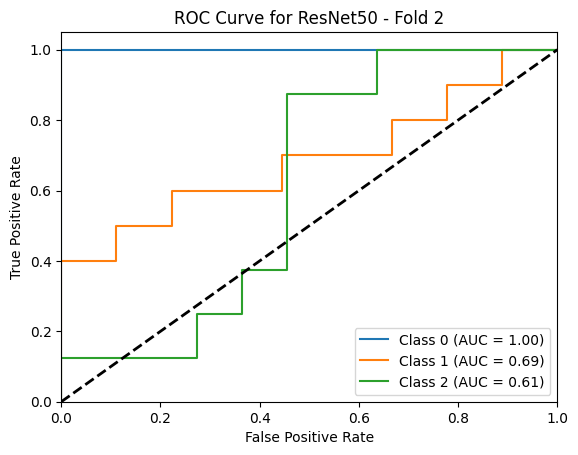

Training VGG16 model for Fold 2...
Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.5744 - loss: 1.0667 - val_accuracy: 0.8750 - val_loss: 0.6460
Epoch 2/10
 1/18 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 1.0000 - loss: 0.6138

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 590ms/step - accuracy: 1.0000 - loss: 0.6138 - val_accuracy: 0.0000e+00 - val_loss: 0.9938
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.5123 - loss: 0.7856 - val_accuracy: 0.6250 - val_loss: 0.4944


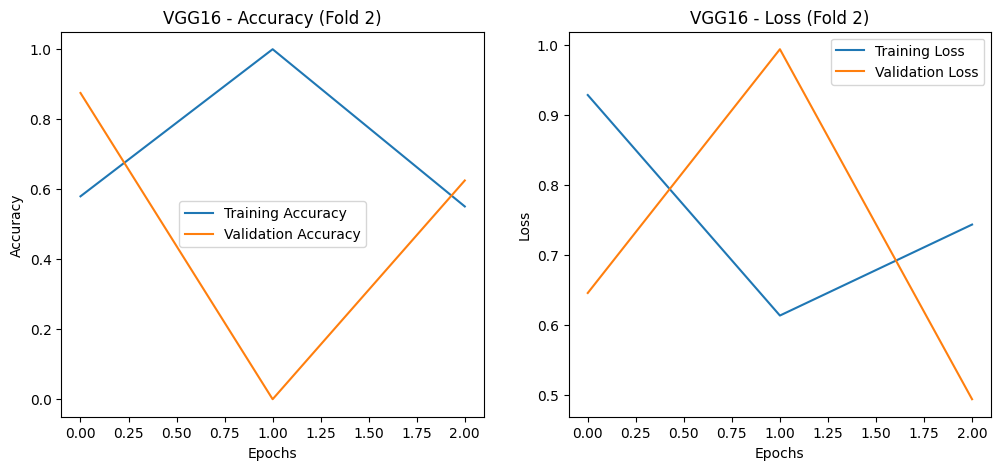

5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8677 - loss: 0.6556
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step


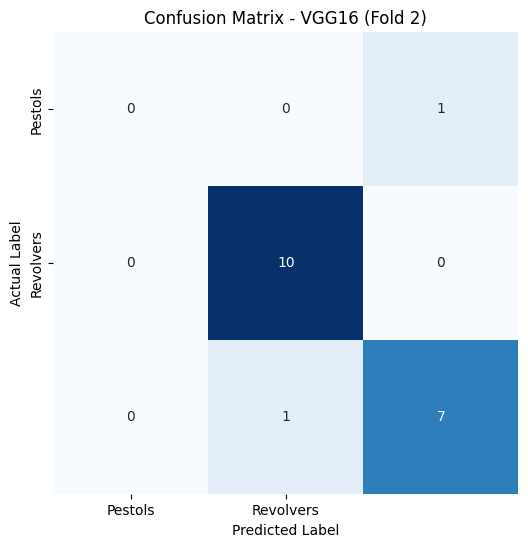

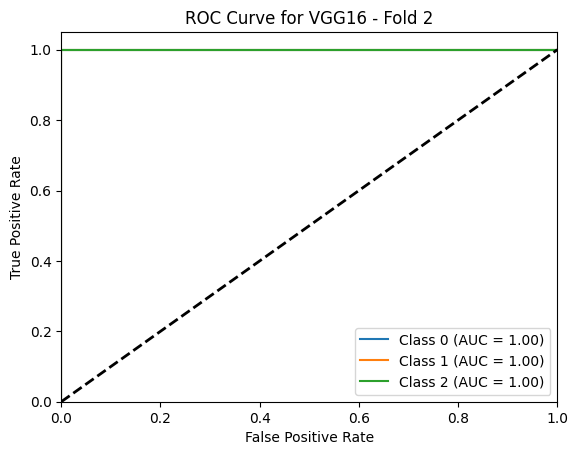

Training EfficientNetB0 model for Fold 2...
Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 706ms/step - accuracy: 0.4279 - loss: 1.0172 - val_accuracy: 0.6250 - val_loss: 0.8681
Epoch 2/10
 1/18 ━━━━━━━━━━━━━━━━━━━━ 4s 237ms/step - accuracy: 0.2500 - loss: 1.3758

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.2500 - loss: 1.3758 - val_accuracy: 0.0000e+00 - val_loss: 0.7874
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 433ms/step - accuracy: 0.2933 - loss: 1.0861 - val_accuracy: 0.3125 - val_loss: 1.0033


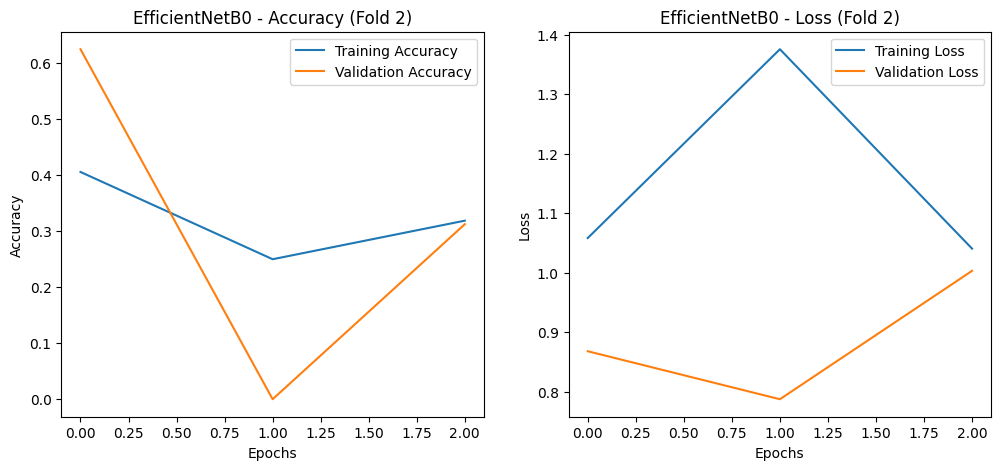

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - accuracy: 0.6893 - loss: 0.9577
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 845ms/step


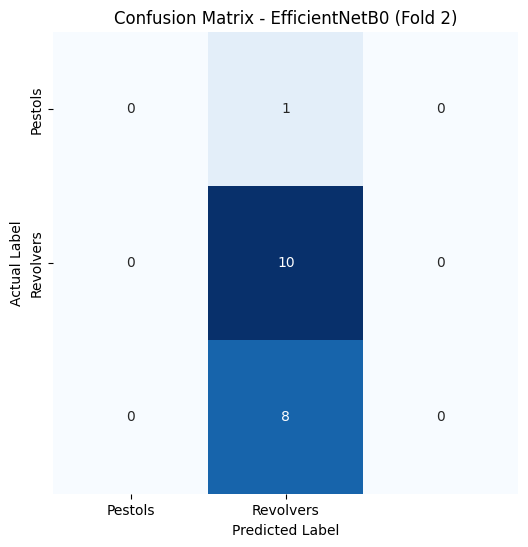

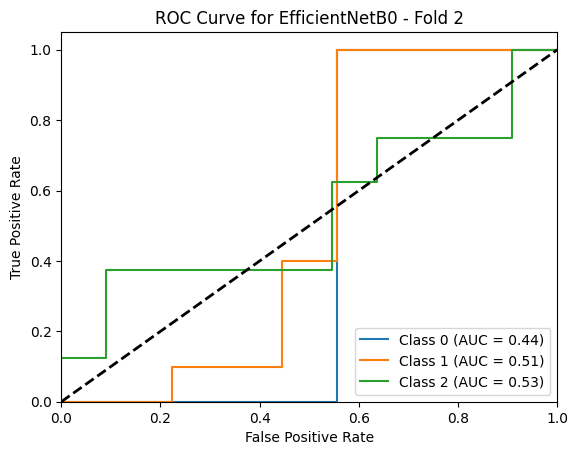

Training Fold 3...
Found 74 validated image filenames belonging to 3 classes.
Found 18 validated image filenames belonging to 3 classes.
Training ResNet50 model for Fold 3...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.4249 - loss: 2.5633 - val_accuracy: 0.2500 - val_loss: 2.5936
Epoch 2/10
 1/18 ━━━━━━━━━━━━━━━━━━━━ 9s 545ms/step - accuracy: 1.0000 - loss: 0.0656

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 1.0000 - loss: 0.0656 - val_accuracy: 1.0000 - val_loss: 0.1042
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 35s 937ms/step - accuracy: 0.5095 - loss: 1.3113 - val_accuracy: 0.2500 - val_loss: 2.4564
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 1.0000 - loss: 0.0650 - val_accuracy: 1.0000 - val_loss: 0.0638
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 926ms/step - accuracy: 0.5307 - loss: 1.2916 - val_accuracy: 0.6875 - val_loss: 1.1793
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 330ms/step - accuracy: 0.5000 - loss: 1.4985 - val_accuracy: 0.0000e+00 - val_loss: 1.0445
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 33s 910ms/step - accuracy: 0.4328 - loss: 1.0236 - val_accuracy: 0.2500 - val_loss: 1.1477


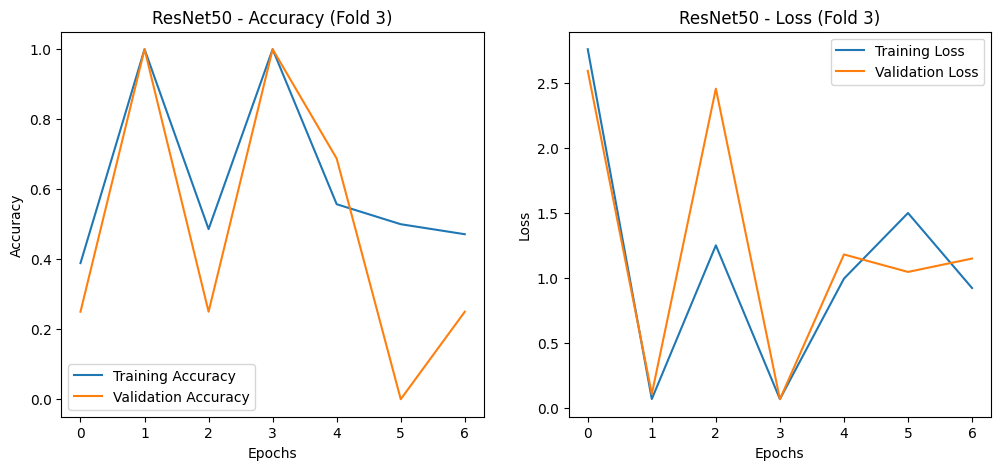

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 810ms/step - accuracy: 0.1528 - loss: 3.0641
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step


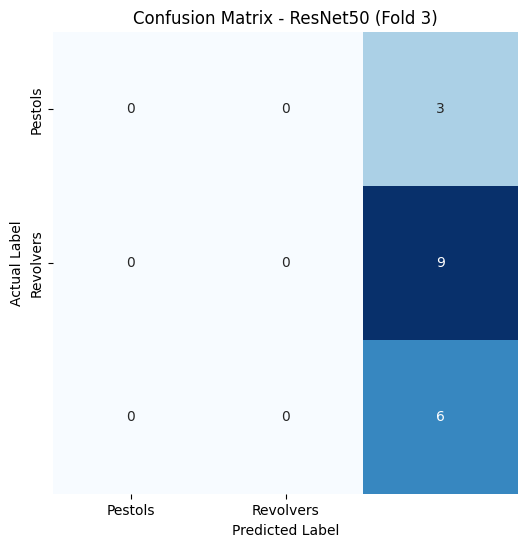

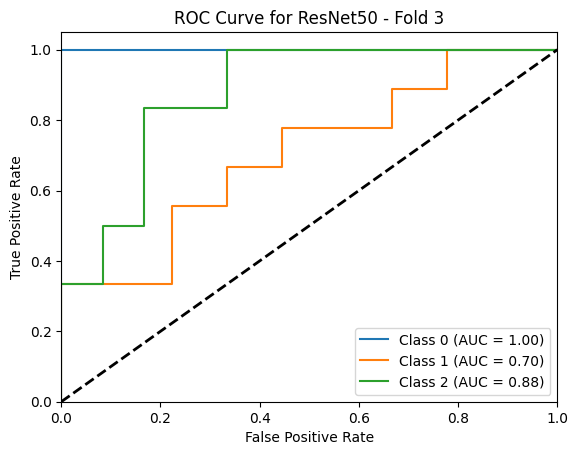

Training VGG16 model for Fold 3...
Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.4157 - loss: 1.3095 - val_accuracy: 0.3125 - val_loss: 0.8801
Epoch 2/10
 1/18 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 1.0000 - loss: 0.3434

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 1.0000 - loss: 0.3434 - val_accuracy: 1.0000 - val_loss: 0.4062
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.7635 - loss: 0.6276 - val_accuracy: 0.6875 - val_loss: 0.6538


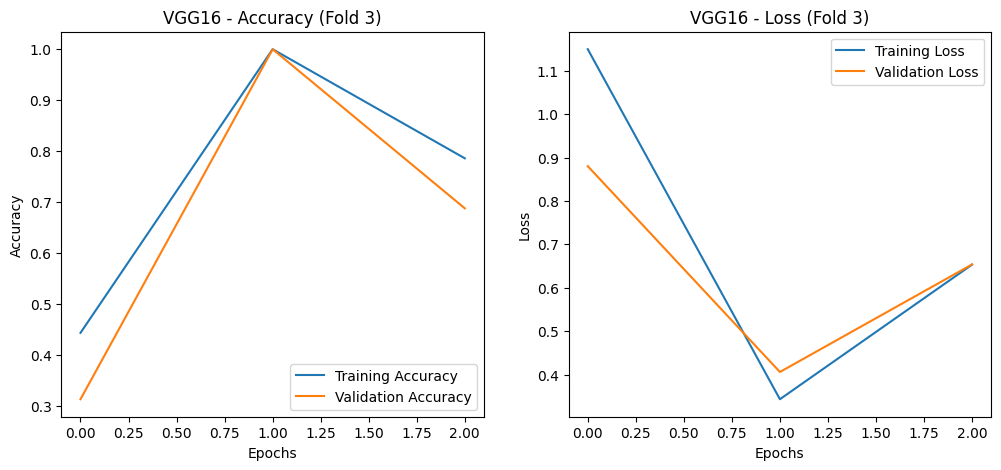

5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.2164 - loss: 1.0521
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step


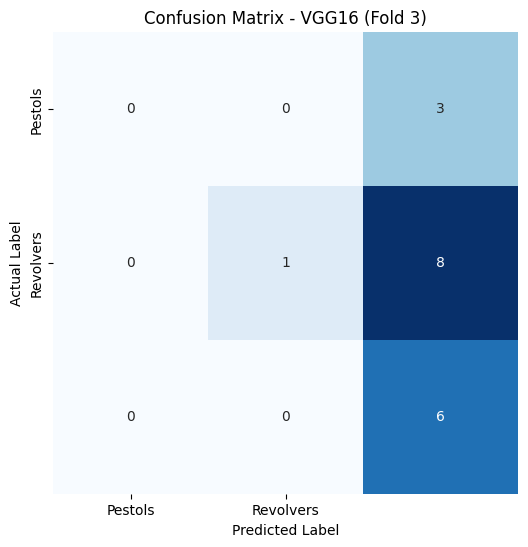

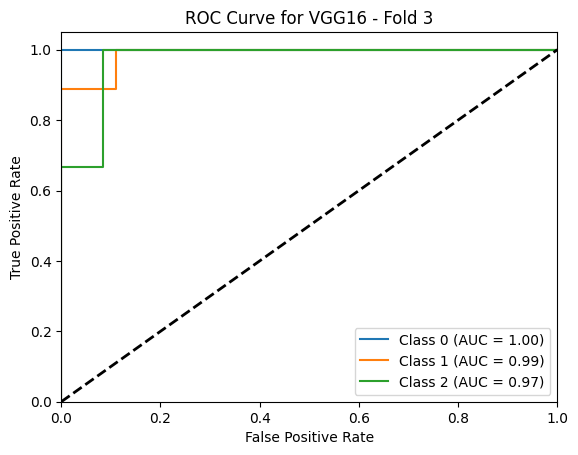

Training EfficientNetB0 model for Fold 3...
Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 591ms/step - accuracy: 0.5235 - loss: 0.9942 - val_accuracy: 0.2500 - val_loss: 1.1246
Epoch 2/10
 1/18 ━━━━━━━━━━━━━━━━━━━━ 3s 221ms/step - accuracy: 0.5000 - loss: 0.7442

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5000 - loss: 0.7442 - val_accuracy: 1.0000 - val_loss: 0.6998
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 414ms/step - accuracy: 0.4077 - loss: 0.9748 - val_accuracy: 0.2500 - val_loss: 1.3605


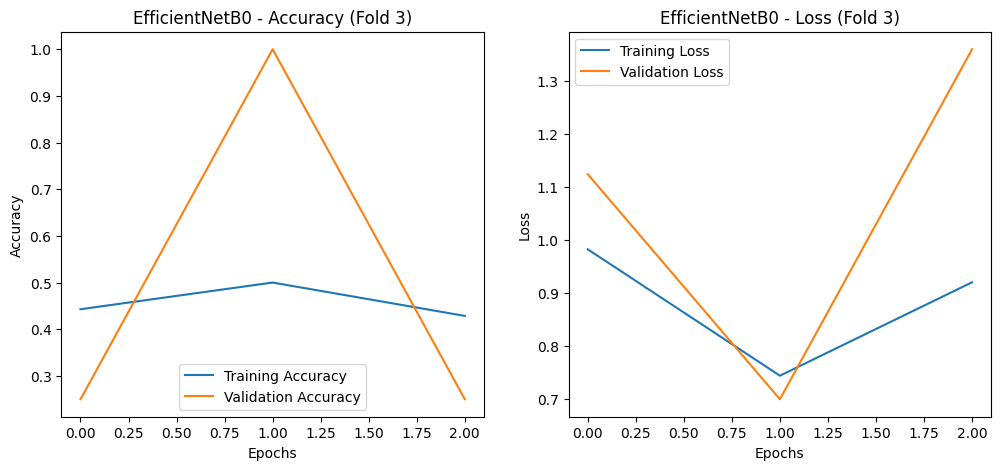

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.1528 - loss: 1.3568
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 983ms/step


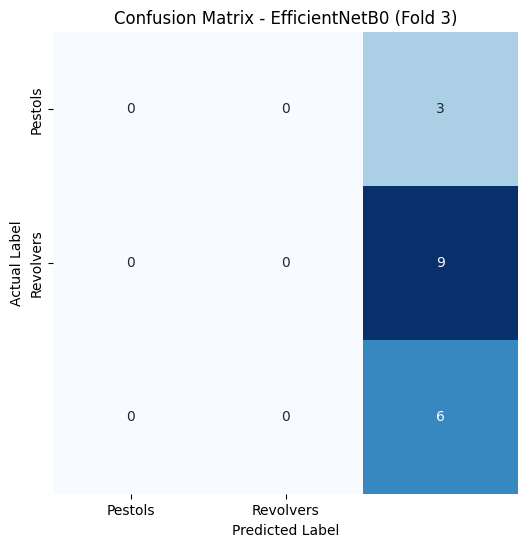

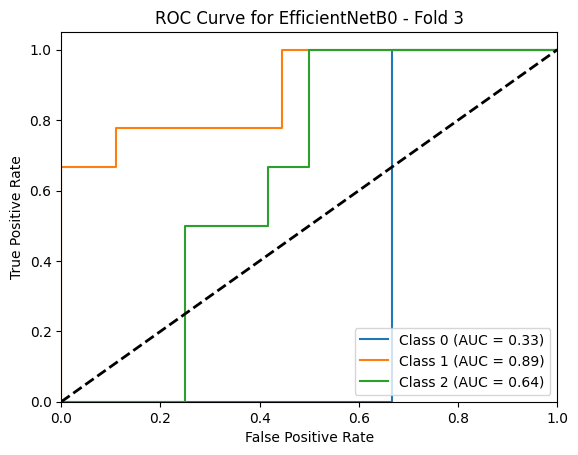

Training Fold 4...
Found 74 validated image filenames belonging to 3 classes.
Found 18 validated image filenames belonging to 2 classes.
Training ResNet50 model for Fold 4...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 742ms/step - accuracy: 0.4367 - loss: 1.8902

ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 2), output.shape=(None, 3)

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

def plot_roc_curve(y_true, y_pred_proba, model_name, fold):
    # Binarize the labels for ROC calculation (assuming classes are 0, 1, 2 for a 3-class problem)
    n_classes = len(np.unique(y_true))
    y_true_binarized = label_binarize(y_true, classes=[i for i in range(n_classes)])

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name} - Fold {fold}')
    plt.legend(loc='lower right')
    plt.show()

# Main K-Fold Cross-Validation Loop
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = {}
fold = 1

# Define data generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_gen = ImageDataGenerator(rescale=1./255)

for train_index, val_index in kf.split(all_image_paths):
    print(f"Training Fold {fold}...")

    # Split data into training and validation sets
    train_images = [all_image_paths[i] for i in train_index]
    train_labels = [all_labels[i] for i in train_index]
    val_images = [all_image_paths[i] for i in val_index]
    val_labels = [all_labels[i] for i in val_index]

    # Create data generators for training and validation
    train_generator = data_gen.flow_from_dataframe(
        dataframe=pd.DataFrame({'filename': train_images, 'class': train_labels}),
        x_col='filename',
        y_col='class',
        target_size=(224, 224),
        batch_size=4,
        class_mode='categorical'
    )

    val_generator = val_gen.flow_from_dataframe(
        dataframe=pd.DataFrame({'filename': val_images, 'class': val_labels}),
        x_col='filename',
        y_col='class',
        target_size=(224, 224),
        batch_size=4,
        class_mode='categorical',
        shuffle=False
    )

    # Check that the generators have data
    if train_generator.samples == 0 or val_generator.samples == 0:
        print(f"Skipping fold {fold} due to insufficient data.")
        fold += 1
        continue

    # Adjust steps_per_epoch and validation_steps
    steps_per_epoch = max(1, train_generator.samples // train_generator.batch_size)
    validation_steps = max(1, val_generator.samples // val_generator.batch_size)

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train and evaluate each model for this fold
    for model_name, base_model in models_to_compare.items():
        print(f"Training {model_name} model for Fold {fold}...")
        model = build_and_compile_model(base_model)

        # Train the model
        history = model.fit(
            train_generator,
            validation_data=val_generator,
            epochs=10,
            steps_per_epoch=steps_per_epoch,
            validation_steps=validation_steps,
            callbacks=[early_stopping]
        )

        # Plot accuracy and loss curves
        plot_training_curves(history, model_name, fold)

        # Evaluate the model
        val_generator.reset()
        val_loss, val_acc = model.evaluate(val_generator)

        # Predictions for confusion matrix and further analysis
        Y_pred = model.predict(val_generator)
        y_pred = np.argmax(Y_pred, axis=1)
        y_true = val_generator.classes

        # Store results for this fold
        if model_name not in results:
            results[model_name] = {'accuracy': [], 'y_true': [], 'y_pred': [], 'Y_pred': []}

        results[model_name]['accuracy'].append(val_acc)
        results[model_name]['y_true'].extend(y_true)
        results[model_name]['y_pred'].extend(y_pred)
        results[model_name]['Y_pred'].extend(Y_pred)

        # Plot confusion matrix for this fold
        plot_confusion_matrix(y_true, y_pred, model_name, fold)

        # Plot ROC curve for this fold (now supports multiclass)
        plot_roc_curve(y_true, Y_pred, model_name, fold)

        # Optionally save the model for each fold
        model.save(f'model_{model_name}_fold_{fold}.h5')

    fold += 1


